In [1]:
# load in required packages
library('Seurat')
library('ggplot2')

Attaching SeuratObject



In [2]:
# load in required data
data_10X <- Read10X(data.dir = "/lustre/projects/Stembryo_Seq/data/sc_sumit/GSE122187_WT_E8.5_1ab") #for inputing 10X data
Emb8 <- CreateSeuratObject(counts=data_10X, project="Emb8.5", min.cells=3, min.features=200)
Emb8[["percent.mt"]] <- PercentageFeatureSet(Emb8, pattern = "^mt-")
# below step is for quality-check
Emb8 <- subset(Emb8, subset = nFeature_RNA > 3000 & nCount_RNA > 10000 & nCount_RNA < 80000 & percent.mt < 5)

In [6]:
# Pre processing data 
Emb8 <- NormalizeData(Emb8, verbose = TRUE)
Emb8 <- FindVariableFeatures(Emb8, verbose = TRUE)
Emb8 <- ScaleData(Emb8, verbose = TRUE)
Emb8 <- RunPCA(Emb8, features = VariableFeatures(object = Emb8), verbose = TRUE)
#Find neighbors and cluster
Emb8 <- FindNeighbors(Emb8, dims = 1:20)
Emb8 <- FindClusters(Emb8, resolution = 0.5)
Emb8 <- RunUMAP(Emb8, dims = 1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  Apom, Lgals2, Apob, Cubn, S100g, Amn, Apoa2, Afp, Ttr, Rbp4 
	   Apoa1, Ctsh, Rhox5, Apoa4, Spp2, Tdh, Slc2a2, Nrk, Pdzk1, Slc13a4 
	   4933402E13Rik, Trap1a, Folr1, Dab2, Spink1, 2610528J11Rik, Clic6, Slc39a5, Aldob, Gipc2 
Negative:  Fabp5, Rplp0, Prdx2, Hdgf, Asns, Ptn, Pim1, Sox11, Alas2, Gypa 
	   Hbb-bh1, Hba-x, Hba-a1, Ccnd2, Klf1, Mllt3, Snca, Hba-a2, Prkar2b, Cited4 
	   Hbb-y, Trim10, Slc4a1, Rfesd, Gata1, Gstm5, Blvrb, Slc25a37, Slc38a5, Epor 
PC_ 2 
Positive:  Mgst3, Gypa, Hbb-bh1, Hba-x, Cited4, Hba-a1, Alas2, Blvrb, Klf1, Hba-a2 
	   Hbb-y, Cpox, Acp5, Snca, Pnpo, Trim10, Hebp1, Car2, Slc4a1, Smim1 
	   Rfesd, Slc25a37, Slc39a8, Gata1, Fech, Ube2l6, Glrx5, Tmem14c, Fam210b, Mrap 
Negative:  Tmsb10, Serpinh1, Cnn3, Tpm4, Tuba1a, Mest, Hmga2, Actg1, Mdk, Marcks 
	   Fkbp1a, Pdia6, Cald1, Cd81, Ngfrap1, Tmsb4x, H2afv, Basp1, Calr, Ifitm2 
	   Actb, Csrp2, Cnn2, Wbp5, Tpm1, Prtg, Vim, Fermt2, Pdlim7, Myl12a 
PC_ 3 
Positive

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18993
Number of edges: 677789

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9425
Number of communities: 22
Elapsed time: 2 seconds


06:34:31 UMAP embedding parameters a = 0.9922 b = 1.112

06:34:31 Read 18993 rows and found 20 numeric columns

06:34:31 Using Annoy for neighbor search, n_neighbors = 30

06:34:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:34:34 Writing NN index file to temp file /tmp/RtmpXJsCew/file1046d1a647c04

06:34:34 Searching Annoy index using 1 thread, search_k = 3000

06:34:39 Annoy recall = 100%

06:34:40 Commencing smooth kNN distance calibration using 1 thread

06:34:41 Initializing from normalized Laplacian + noise

06:34:42 Commencing optimization for 200 epochs, with 794626 positive edges

06:35:05 Optimization finished



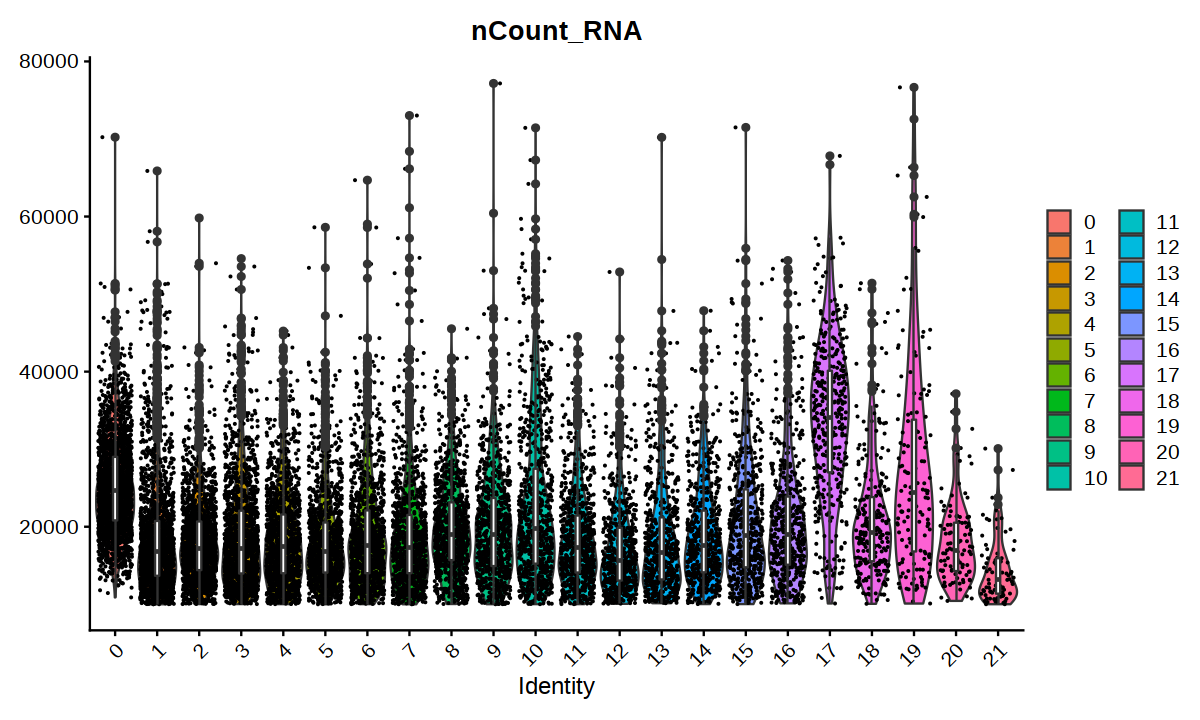

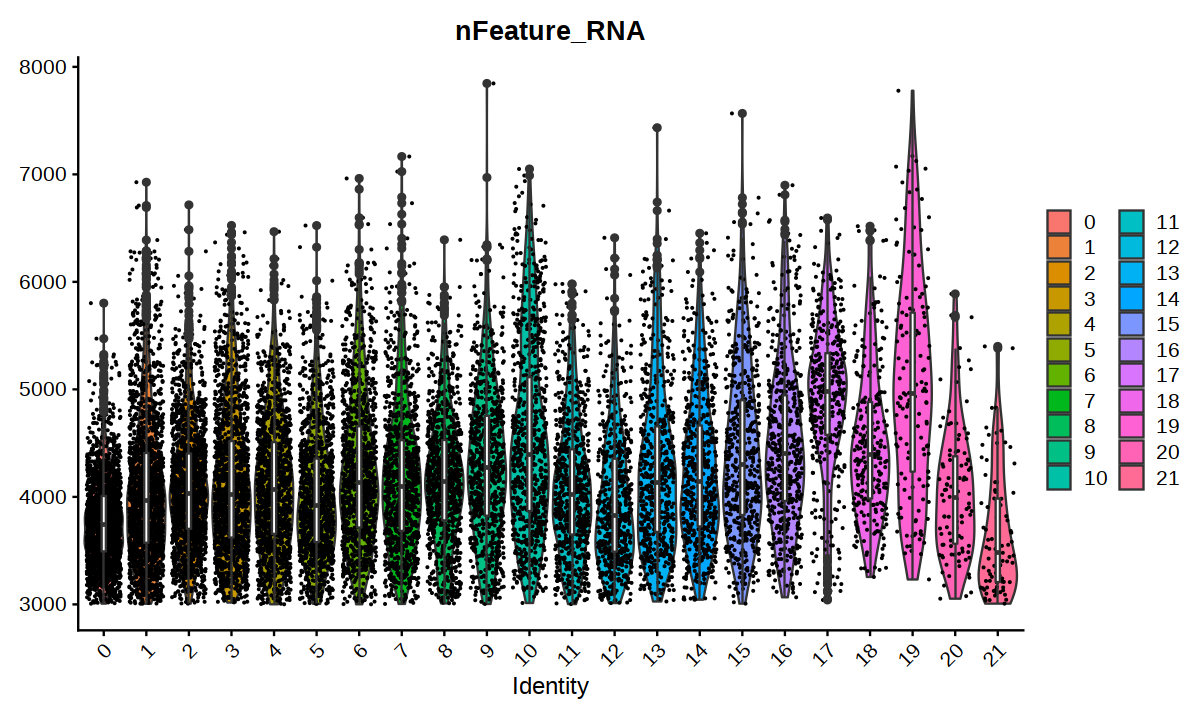

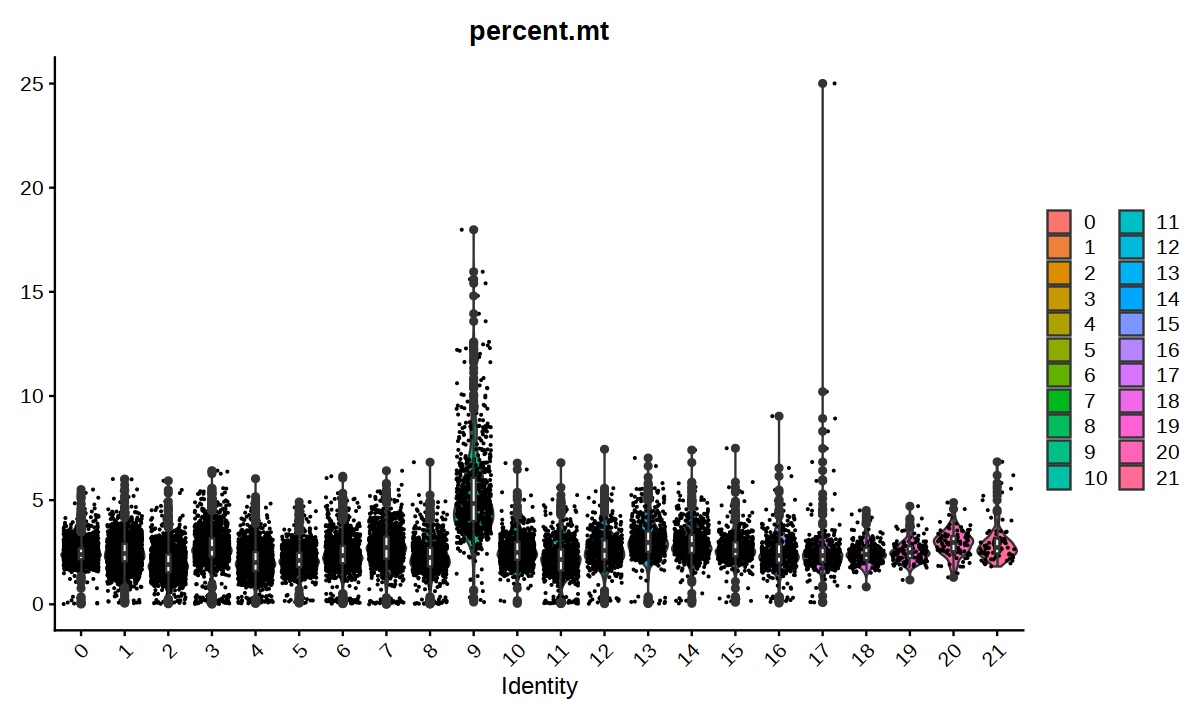

In [7]:
#QC after clustering - remove wonky clusters
options(repr.plot.width = 10, repr.plot.height = 6)
VlnPlot(Emb8, features = ("nCount_RNA")) + geom_boxplot(width=0.1, fill="white") 
VlnPlot(Emb8, features = ("nFeature_RNA")) + geom_boxplot(width=0.1, fill="white") 
VlnPlot(Emb8, features = ("percent.mt")) + geom_boxplot(width=0.1, fill="white") 

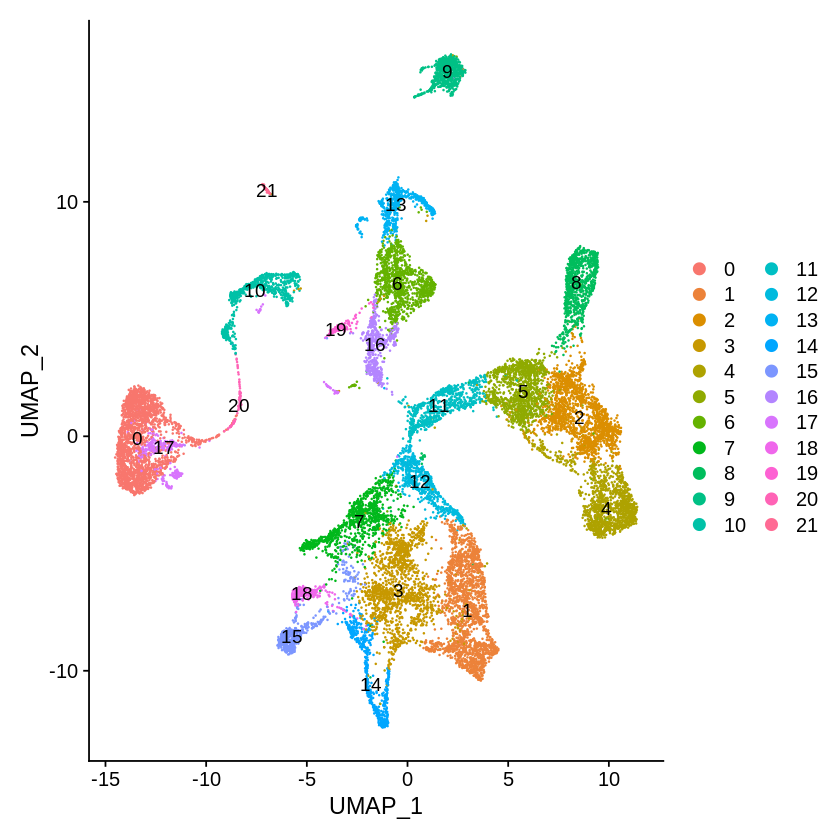

In [4]:
DimPlot(Emb8, reduction = "umap", label = TRUE) 

In [6]:
cluster0 <- FindMarkers(Emb8, ident.1 = 0, min.pct = 0.25, only.pos = TRUE)
cluster1 <- FindMarkers(Emb8, ident.1 = 1, min.pct = 0.25, only.pos = TRUE)
cluster2 <- FindMarkers(Emb8, ident.1 = 2, min.pct = 0.25, only.pos = TRUE)
cluster3 <- FindMarkers(Emb8, ident.1 = 3, min.pct = 0.25, only.pos = TRUE)
cluster4 <- FindMarkers(Emb8, ident.1 = 4, min.pct = 0.25, only.pos = TRUE)
cluster5 <- FindMarkers(Emb8, ident.1 = 5, min.pct = 0.25, only.pos = TRUE)
cluster6 <- FindMarkers(Emb8, ident.1 = 6, min.pct = 0.25, only.pos = TRUE)
cluster7 <- FindMarkers(Emb8, ident.1 = 7, min.pct = 0.25, only.pos = TRUE)
cluster8 <- FindMarkers(Emb8, ident.1 = 8, min.pct = 0.25, only.pos = TRUE)
cluster9 <- FindMarkers(Emb8, ident.1 = 9, min.pct = 0.25, only.pos = TRUE)
cluster10 <- FindMarkers(Emb8, ident.1 = 10, min.pct = 0.25, only.pos = TRUE)
cluster11 <- FindMarkers(Emb8, ident.1 = 11, min.pct = 0.25, only.pos = TRUE)
cluster12 <- FindMarkers(Emb8, ident.1 = 12, min.pct = 0.25, only.pos = TRUE)
cluster13 <- FindMarkers(Emb8, ident.1 = 13, min.pct = 0.25, only.pos = TRUE)
cluster14 <- FindMarkers(Emb8, ident.1 = 14, min.pct = 0.25, only.pos = TRUE)
cluster15 <- FindMarkers(Emb8, ident.1 = 15, min.pct = 0.25, only.pos = TRUE)
cluster16 <- FindMarkers(Emb8, ident.1 = 16, min.pct = 0.25, only.pos = TRUE)
cluster17 <- FindMarkers(Emb8, ident.1 = 17, min.pct = 0.25, only.pos = TRUE)
cluster18 <- FindMarkers(Emb8, ident.1 = 18, min.pct = 0.25, only.pos = TRUE)
cluster19 <- FindMarkers(Emb8, ident.1 = 19, min.pct = 0.25, only.pos = TRUE)
cluster20 <- FindMarkers(Emb8, ident.1 = 20, min.pct = 0.25, only.pos = TRUE)
cluster21 <- FindMarkers(Emb8, ident.1 = 21, min.pct = 0.25, only.pos = TRUE)
clus0 <- cluster0[,0]
clus1 <- cluster1[,0]
clus2 <- cluster2[,0]
clus3 <- cluster3[,0]
clus4 <- cluster4[,0]
clus5 <- cluster5[,0]
clus6 <- cluster6[,0]
clus7 <- cluster7[,0]
clus8 <- cluster8[,0]
clus9 <- cluster9[,0]
clus10 <- cluster10[,0]
clus11 <- cluster11[,0]
clus12 <- cluster12[,0]
clus13 <- cluster13[,0]
clus14 <- cluster14[,0]
clus15 <- cluster15[,0]
clus16 <- cluster16[,0]
clus17 <- cluster17[,0]
clus18 <- cluster18[,0]
clus19 <- cluster19[,0]
clus20 <- cluster20[,0]
clus21 <- cluster21[,0]
clus0 <- head(clus0, n=10)
clus1 <- head(clus1, n=10)
clus2 <- head(clus2, n=10)
clus3 <- head(clus3, n=10)
clus4 <- head(clus4, n=10)
clus5 <- head(clus5, n=10)
clus6 <- head(clus6, n=10)
clus7 <- head(clus7, n=10)
clus8 <- head(clus8, n=10)
clus9 <- head(clus9, n=10)
clus10 <- head(clus10, n=10)
clus11 <- head(clus11, n=10)
clus12 <- head(clus12, n=10)
clus13 <- head(clus13, n=10)
clus14 <- head(clus14, n=10)
clus15 <- head(clus15, n=10)
clus16 <- head(clus16, n=10)
clus17 <- head(clus17, n=10)
clus18 <- head(clus18, n=10)
clus19 <- head(clus19, n=10)
clus20 <- head(clus20, n=10)
clus21 <- head(clus21, n=10)
clus0 
clus1 
clus2 
clus3 
clus4 
clus5 
clus6 
clus7 
clus8 
clus9
clus10 
clus11 
clus12 
clus13 
clus14 
clus15 
clus16 
clus17
clus18
clus19 
clus20 
clus21

Abcb6
Tuba4a
Steap3
Btg2
Creg1
Mgst3
Ppox
Spta1
Pycr2
Wdr26


Ddr2
Itih5
Prrx2
Tnfaip6
Tcf15
Nnat
Snai1
Foxd2
Mfap2
Col26a1


Pantr1
En1
Ildr2
Tmsb4x
Fabp5
Sox2
Sfrp2
Crabp2
Pou3f2
Cntfr


Prrx1
Pbx1
Prrx2
Mdk
Meis2
Arg1
Alx1
Meis1
Lhx1
Osr1


Igfbp2
Lhx2
Pax6
Pcsk1n
Eras
Irs4
Pak3
Sox2
Syt11
Tal2


Hoxd4
Pax6
Mir124-2hg
Sox2
Sfrp2
Crabp2
Neurog2
Pou3f2
Pcsk9
Slc2a1


Igfbp5
Cacna1b
Spint1
Fermt1
Wfdc2
Rab25
Npnt
Esrp1
Acer2
Tmem54


Prrx1
Hoxd9
Hoxd1
Cdx4
Msx1
Naaa
Tbx3
Cdx2
Hoxaas3
Hoxa7


Tfap2b
Dlx2
Plp1
Lmo4
Foxd3
Erbb3
Plcg2
Ets1
Fam212a
Ngfr


Sgk3
Slc40a1
1700019D03Rik
Pgap1
Mreg
Vil1
Ihh
Slc23a3
2810459M11Rik
Spp2


Sox17
Ptpn18
Hecw2
Klf7
Ralb
Itpkb
Atf3
Cd34
Vim
Notch1


Cdx4
Tcea3
Hes3
Epha5
Cdx2
Hoxaas3
Hoxa7
Hoxa9
Evx1os
Evx1


Nrarp
Gm14226
Cited1
Cdx4
Pcdh19
Lef1
Hoxaas3
Dll3
Tbx6
Ifitm1


Ihh
Fermt1
Foxa2
Ambp
Shh
Mnx1
Cldn4
Foxa3
Spint2
Nepn


Myl1
Des
Sphkap
Ramp1
Tmem163
Rassf5
Lmod1
Tnni1
Tnnt2
Rcsd1


Col3a1
Col5a2
Sdpr
Spats2l
Ramp1
Hlx
Ptges
Aplnr
Creb3l1
Angpt4


Wnt6
Lad1
Batf3
Fermt1
Tfap2c
Ldoc1
Rab25
Npnt
Esrp1
Gjb3


Slc4a1
Klf1
Trim10
Gata1
Alas2
Snca
Gypa
Epor
Mrap
Hbq1b


Sdpr
Grem2
Creb3l1
Bmp2
Mbnl3
Postn
Pitx2
Dkk2
Tek
Tinagl1


Wnt6
Tacstd2
Tac2
Ager
Ppl
Vgll3
Flt1
Lrrn4
Klhdc8a
Tmem54


Inpp5d
Ptpn7
Rgs18
Ncf2
Fcer1g
Arhgap30
Prkcq
Ptgs1
Spi1
Was


Grem2
Thbd
Pmepa1
Ptk6
Drp2
Trpc5os
Lrrc38
Hs3st1
Eva1a
Fxyd3


In [1]:
Emb8 <- readRDS("Emb85.rds")

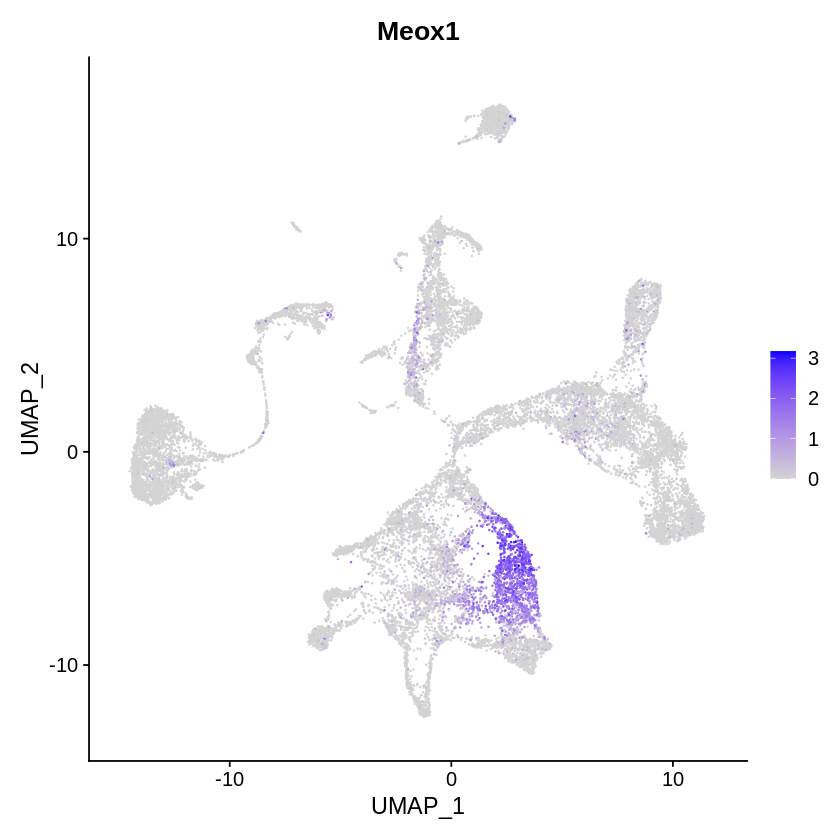

In [4]:
FeaturePlot(Emb8, features = ('Meox1'))

In [4]:
meoxg <- subset(x = Emb8, subset = Meox1 > 1)
meoxg <- NormalizeData(meoxg, verbose = TRUE)
meoxg <- FindVariableFeatures(meoxg, verbose = TRUE)
meoxg <- ScaleData(meoxg, verbose = TRUE)
meoxg <- RunPCA(meoxg, features = VariableFeatures(meoxg), verbose = TRUE)
meoxg <- FindNeighbors(meoxg, dims = 1:20)
meoxg <- FindClusters(meoxg, resolution = 0.2)
meoxg <- RunUMAP(meoxg, dims = 1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  Cldn7, Mt1, Apom, Cldn6, 2610528J11Rik, Spink1, Amn, Mt2, Car7, Ttr 
	   Rhox5, S100g, Car4, Rbp4, Apob, Apoa1, Folr1, Prss8, Ctsh, Apoa2 
	   Afp, Lgals2, Cubn, Gipc2, Soat2, Krt8, Serpinf2, Ass1, Trap1a, Apoa4 
Negative:  Tcf15, Tmsb10, Fbn2, Foxc2, Meox1, Gstm5, H2afv, Ptn, Lef1, Ncam1 
	   Ifitm1, Sms, Arg1, Aldh1a2, Pcdh19, Ppp1r1a, Ebf1, Fgf18, Ntn1, Foxc1 
	   Foxp1, Aldoc, Dll3, Nnat, Cadm1, Notch1, Cer1, Cald1, Mllt3, Rragd 
PC_ 2 
Positive:  Mest, Marcks, Eva1b, Pcolce, Eno3, Cnn2, Flrt2, Cdh11, Peg3, Id2 
	   Col26a1, Nr2f1, Serpinf1, Clmp, Prrx1, Fst, Foxp2, Hsd11b2, Rbms1, Pvrl2 
	   Col3a1, Nrp1, Traf3ip2, Meg3, Tmem119, Asb4, Lgals1, Col2a1, Mdfi, Hapln1 
Negative:  Ifitm1, Dll3, Hoxb5os, Pcdh19, Lef1, Slc9a3r1, Cited1, Fgf18, Hoxb9, Notch1 
	   Laptm4b, Pcdh8, Cer1, Nrarp, Aldoc, Hes7, Dll1, Magi1, Cadm1, Ppp1r1a 
	   Tbx6, Mllt3, Hoxb8, Ripply2, Hoxa7, Lfng, Greb1l, Synm, Hoxaas3, Hoxa5 
PC_ 3 
Positive:  Tcf15, Apom

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1520
Number of edges: 48325

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8797
Number of communities: 6
Elapsed time: 0 seconds


06:43:36 UMAP embedding parameters a = 0.9922 b = 1.112

06:43:36 Read 1520 rows and found 20 numeric columns

06:43:36 Using Annoy for neighbor search, n_neighbors = 30

06:43:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:43:37 Writing NN index file to temp file /tmp/Rtmp3M3LoK/file1c48c4a590839

06:43:37 Searching Annoy index using 1 thread, search_k = 3000

06:43:37 Annoy recall = 100%

06:43:37 Commencing smooth kNN distance calibration using 1 thread

06:43:38 Initializing from normalized Laplacian + noise

06:43:38 Commencing optimization for 500 epochs, with 55776 positive edges

06:43:42 Optimization finished



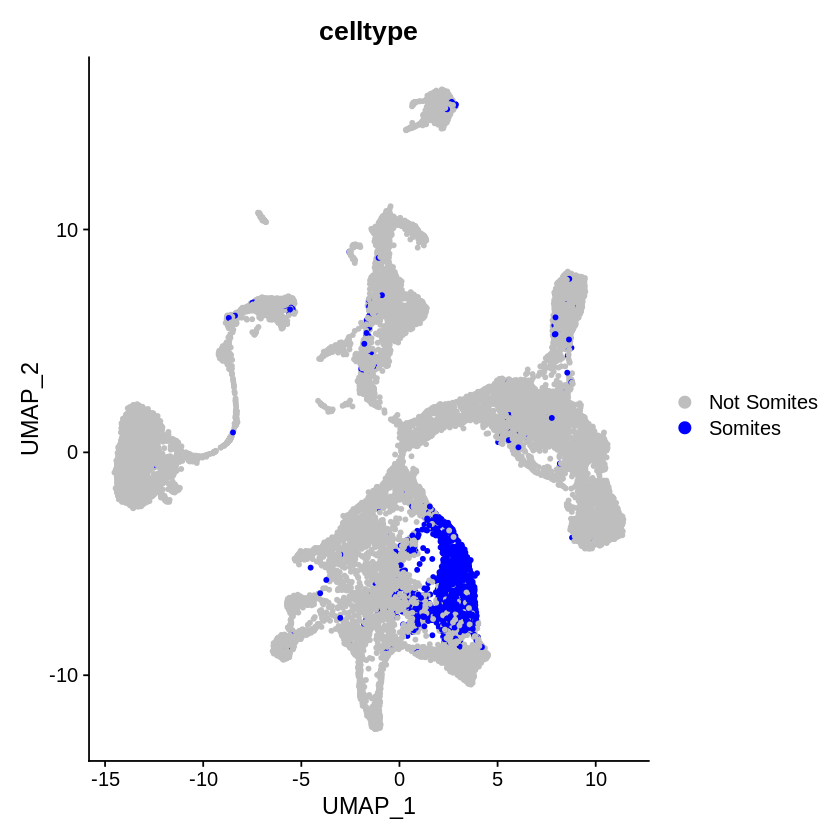

In [9]:
combi <- Emb8
combi@meta.data$celltype <-
  ifelse(
    rownames(combi@meta.data) %in% colnames(meoxg), "Somites", "Not Somites")
#combi$SIdentity <- paste(meoxg$Posterior,meoxg$Anterior)
DimPlot(object = combi, group.by = 'celltype', pt.size = 1, cols = c("grey", "blue"))

In [10]:
combig <- SetIdent(combi, value = combi@meta.data$celltype)
markers <- FindMarkers(combig, ident.1 = "Somites", ident.2 = "Not Somites", only.pos = TRUE, pseudocount.use = 0.1)
markers <- head(markers, n=50)
markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fap,0.000000e+00,0.8601351,0.121,0.002,0.000000e+00
Meis2,0.000000e+00,1.1779295,0.982,0.658,0.000000e+00
Pax1,0.000000e+00,1.8813695,0.194,0.015,0.000000e+00
Tcf15,0.000000e+00,4.7237697,0.824,0.090,0.000000e+00
Cer1,0.000000e+00,2.2233376,0.151,0.006,0.000000e+00
Foxd2,0.000000e+00,1.6193033,0.351,0.044,0.000000e+00
Col26a1,0.000000e+00,1.5415837,0.581,0.146,0.000000e+00
Uncx,0.000000e+00,2.4206687,0.218,0.009,0.000000e+00
Halr1,0.000000e+00,1.2820469,0.270,0.030,0.000000e+00


In [11]:
markers <- markers[,0]
markers

Fap
Meis2
Pax1
Tcf15
Cer1
Foxd2
Col26a1
Uncx
Halr1
Arg1
Traf3ip2


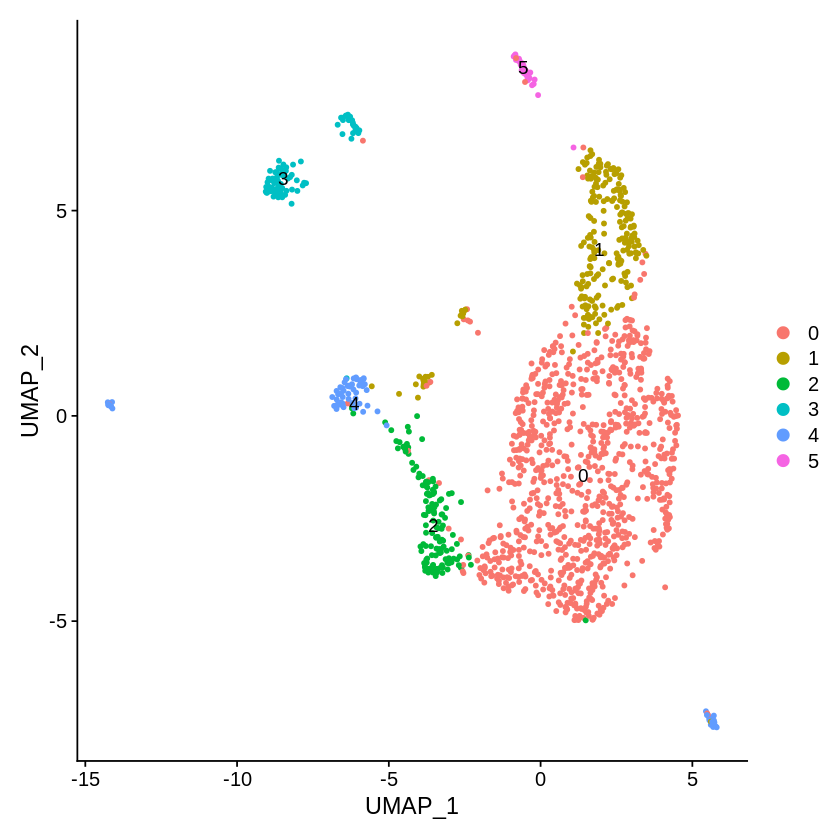

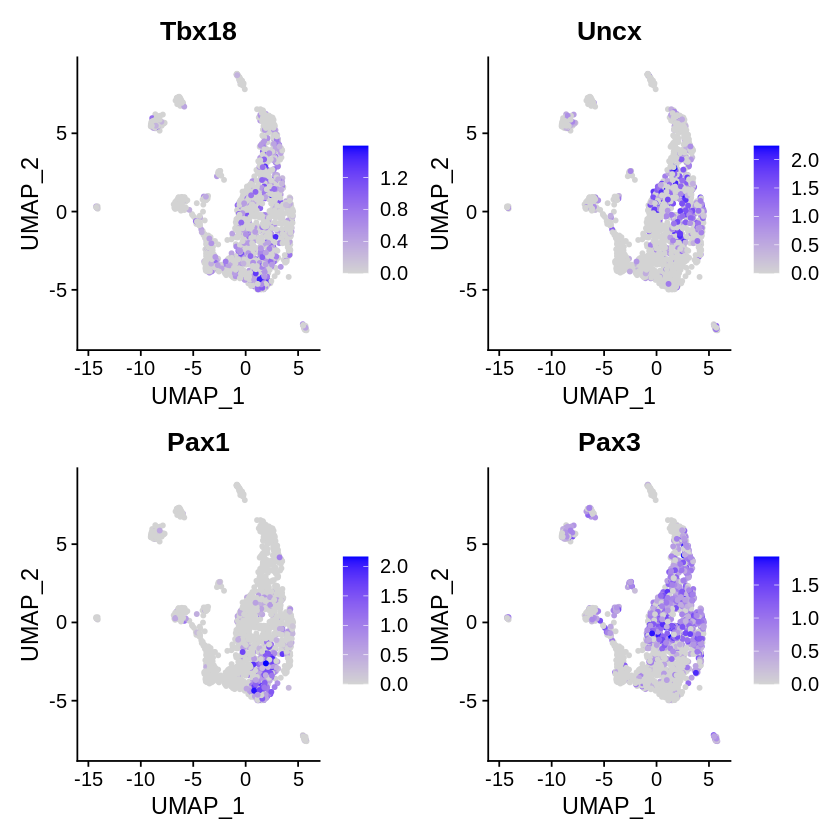

In [6]:
DimPlot(meoxg, reduction = 'umap', label = T) 
FeaturePlot(meoxg, features = c("Tbx18", "Uncx", "Pax1", "Pax3"))

In [13]:
uncx.g <- subset(x = meoxg, subset = Uncx > 1)
tbx18.g <- subset(x = meoxg, subset = Tbx18 > 1)
pax1.g <- subset(x = meoxg, subset = Pax1 > 1)
pax3.g <- subset(x = meoxg, subset = Pax3 > 1)

In [14]:
meoxg@meta.data$Anterior <-
  ifelse(
    rownames(meoxg@meta.data) %in% colnames(tbx18.g), "Anterior", "")
meoxg@meta.data$Posterior <-
  ifelse(
    rownames(meoxg@meta.data) %in% colnames(uncx.g), "Posterior", "")
meoxg@meta.data$Dorsal <-
  ifelse(
    rownames(meoxg@meta.data) %in% colnames(pax3.g), "Dorsal", "")
meoxg@meta.data$Ventral <-
  ifelse(
    rownames(meoxg@meta.data) %in% colnames(pax1.g), "Ventral", "")

meoxg$APIdentity <- paste(meoxg$Posterior,meoxg$Anterior)
meoxg$DVIdentity <- paste(meoxg$Dorsal,meoxg$Ventral)

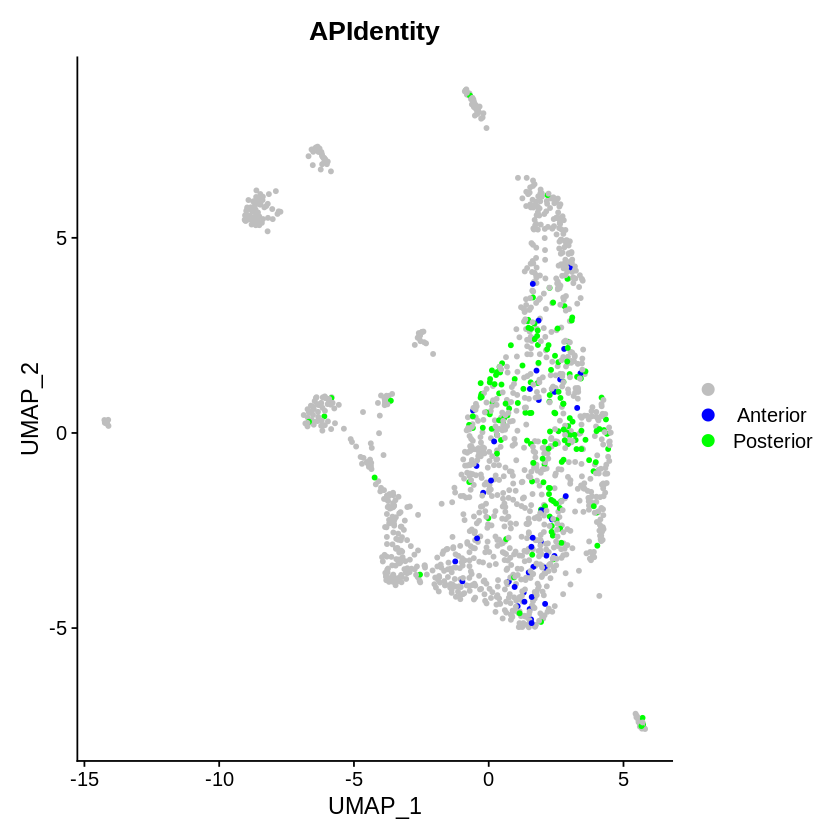

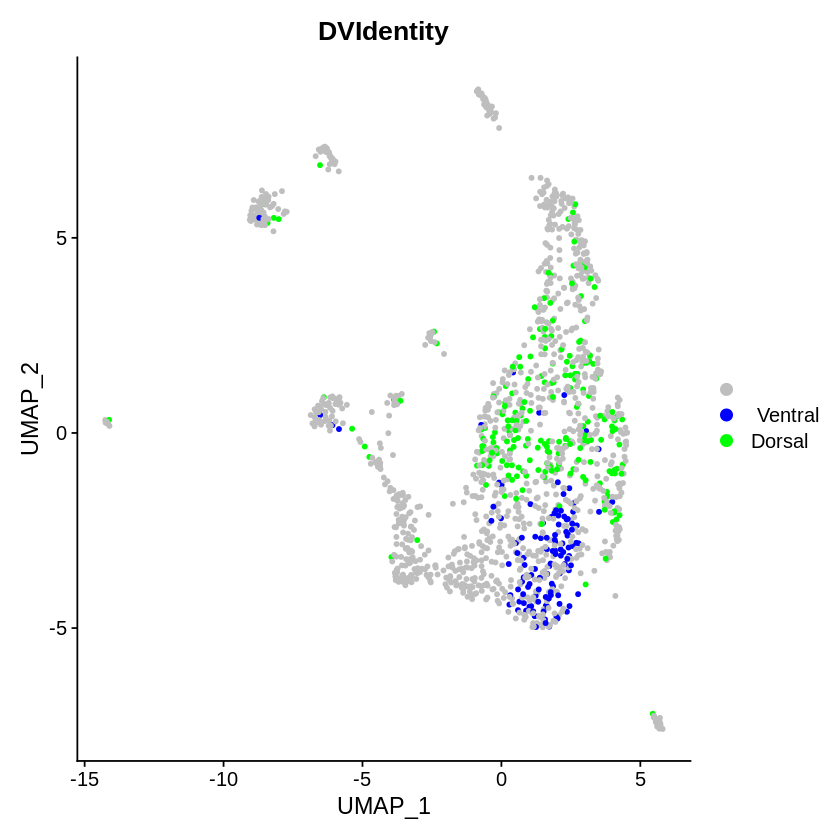

In [15]:
pl1 <- DimPlot(object = meoxg, group.by = 'APIdentity', pt.size = 1, cols = c("grey", "blue", "green", "red"))
pl2 <- DimPlot(object = meoxg, group.by = 'DVIdentity', pt.size = 1, cols = c("grey", "blue", "green", "red"))
pl1 
pl2

In [16]:
meow.g <- SetIdent(meoxg, value = meoxg@meta.data$APIdentity)
meoy.g <- SetIdent(meoxg, value = meoxg@meta.data$DVIdentity)
Amarkers <- FindMarkers(meow.g, ident.1 = " Anterior", ident.2 = "Posterior ", only.pos = TRUE, pseudocount.use = 0.1)#try using DESeq2, MAST
Pmarkers <- FindMarkers(meow.g, ident.1  =  "Posterior ", ident.2 = " Anterior", only.pos = TRUE, pseudocount.use = 0.1)
Vmarkers <- FindMarkers(meoy.g, ident.1 =  " Ventral", ident.2 = "Dorsal ", only.pos = TRUE, pseudocount.use = 0.1)
Dmarkers <- FindMarkers(meoy.g, ident.1 = "Dorsal ", ident.2 =  " Ventral", only.pos = TRUE, pseudocount.use = 0.1)

In [12]:
Amarkers <- head(Amarkers, n=50)
#Amarkers <- Amarkers[,0]
Amarkers
Pmarkers <- head(Pmarkers, n=50)
#Pmarkers <- Pmarkers[,0]
Pmarkers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tbx18,6.336240e-70,3.6353926,1.000,0.019,1.292276e-65
Cnn2,3.074788e-14,1.3797470,0.829,0.599,6.271031e-10
Ptn,1.990877e-12,0.6895856,0.992,0.988,4.060393e-08
Tmem119,5.262597e-11,1.6240784,0.378,0.099,1.073307e-06
Sox9,7.845874e-10,1.7318553,0.462,0.204,1.600166e-05
Marcks,1.024300e-09,0.7499646,0.976,0.981,2.089059e-05
Maged1,3.044104e-09,0.5112342,0.968,0.963,6.208450e-05
Asb4,9.705003e-09,1.4428993,0.319,0.086,1.979335e-04
Col9a1,1.667306e-08,1.5852893,0.359,0.123,3.400471e-04


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Uncx,1.869203e-82,4.8434798,1.000,0.032,3.812240e-78
Meox1,1.938112e-13,0.5184722,1.000,1.000,3.952779e-09
Plxna2,1.129737e-11,1.0856008,0.426,0.124,2.304099e-07
Gchfr,2.002809e-11,1.1388706,0.346,0.080,4.084729e-07
Dmrt2,3.051366e-10,1.4781346,0.407,0.139,6.223261e-06
Dll1,4.338452e-10,1.0357826,0.327,0.080,8.848272e-06
Rbp1,4.457175e-10,0.6025031,0.944,0.797,9.090409e-06
Odc1,8.253216e-09,0.4318909,1.000,0.968,1.683243e-04
Hoxb4,9.146012e-09,0.7842119,0.642,0.339,1.865329e-04


In [17]:
Amarkers <- head(Amarkers, n=50)
#Amarkers <- Amarkers[,0]
Amarkers
Pmarkers <- head(Pmarkers, n=50)
#Pmarkers <- Pmarkers[,0]
Pmarkers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tbx18,2.775140e-42,4.4836763,1.000,0.025,5.659898e-38
Fhl2,6.141732e-07,1.6723568,0.390,0.098,1.252606e-02
Tmem119,6.764583e-07,1.7965276,0.390,0.098,1.379637e-02
Ptn,9.824419e-07,0.6858874,1.000,0.988,2.003690e-02
Gpx3,1.727680e-06,1.0199563,0.951,0.840,3.523604e-02
Ntng1,1.844130e-06,1.4434549,0.317,0.061,3.761103e-02
Cnn2,4.494609e-06,1.2898260,0.805,0.601,9.166755e-02
Tril,5.316210e-06,1.1843850,0.195,0.018,1.084241e-01
Saa2,5.389491e-06,1.8300646,0.317,0.067,1.099187e-01


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Uncx,3.229085e-23,4.8576138,1.000,0.024,6.585720e-19
Rbp1,1.244863e-05,0.7271682,0.945,0.805,2.538899e-01
Bex4,1.431481e-05,0.8226820,0.975,0.854,2.919505e-01
Uqcrq,3.146024e-05,0.4618613,0.994,0.976,6.416315e-01
Plxna2,4.314685e-05,1.5704846,0.423,0.073,8.799799e-01
Cadm1,4.478033e-05,0.6835557,0.982,0.902,9.132949e-01
Rpl36-ps3,4.707134e-05,1.0665935,0.693,0.268,9.600200e-01
Bex1,1.012920e-04,0.8098104,0.945,0.756,1.000000e+00
Lyar,1.044606e-04,0.4274016,1.000,1.000,1.000000e+00


In [18]:
Amarkers <- head(Amarkers, n=50)
Amarkers <- Amarkers[,0]
Amarkers
Pmarkers <- head(Pmarkers, n=50)
Pmarkers <- Pmarkers[,0]
Pmarkers

Tbx18
Fhl2
Tmem119
Ptn
Gpx3
Ntng1
Cnn2
Tril
Saa2
Cd81
Col9a1


Uncx
Rbp1
Bex4
Uqcrq
Plxna2
Cadm1
Rpl36-ps3
Bex1
Lyar
Dpy30
Mapk12


In [19]:
write.csv(Pmarkers, file = 'Pmarkers.csv')
write.csv(Amarkers, file = 'Amarkers.csv')

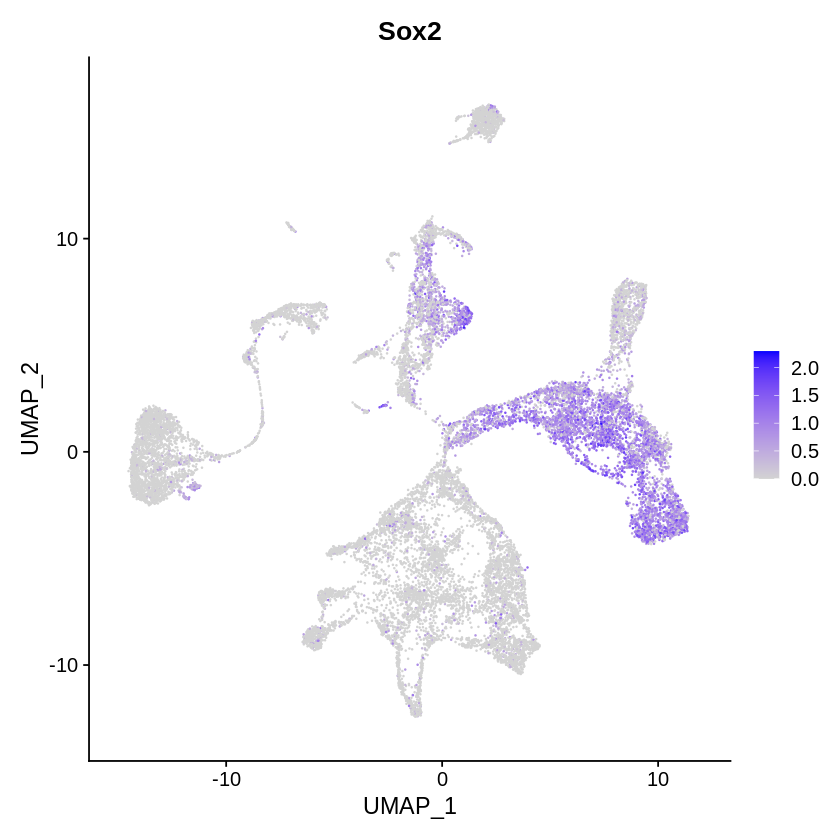

In [14]:
FeaturePlot(Emb8, features = ('Sox2'))

In [4]:
nte <- subset(x = Emb8, subset = Sox1 > 0.5)
nte <- NormalizeData(nte, verbose = TRUE)
nte <- FindVariableFeatures(nte, verbose = TRUE)
nte <- ScaleData(nte, verbose = TRUE)
nte <- RunPCA(nte, features = VariableFeatures(object = nte), verbose = TRUE)
nte <- FindNeighbors(nte, dims = 1:20)
nte <- FindClusters(nte, resolution = 0.2)
nte <- RunUMAP(nte, dims = 1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  Krt18, Krt8, Cldn7, Apoe, Vamp8, Cldn6, H19, Car4, Epcam, Phlda1 
	   Dlk1, Ttr, 2200002D01Rik, Rhox5, Stard10, Rbp4, Dusp9, Stard8, Slc39a5, Six3 
	   Irs4, Afp, Tmprss2, Spp2, Trap1a, Ctsh, Cdh1, Mest, Spink1, Cd9 
Negative:  Crabp2, Ccnd2, Tubb2b, Irx3, Hoxd4, Fgfbp3, 1700011H14Rik, Crabp1, Fabp5, Fhl1 
	   Tshz1, Foxb1, Hoxb2, Rarb, Pcsk9, Hoxa2, Hoxb4, Hes5, Sfrp2, Idi1 
	   Pax6, Meis2, Spsb4, Hoxb3, Tuba1a, Cpn1, Mdk, Fam181a, Rcn1, Cd24a 
PC_ 2 
Positive:  Pcbd1, Tagln2, 1700011H14Rik, Hoxd4, Fgfbp3, Gpx3, Tmprss2, Tshz1, Hoxb4, Hoxa1 
	   Amn, Spink1, Apom, Cldn7, Nrk, Rbp4, Cpn1, Ccnd2, Afp, Apob 
	   Ass1, Rhox5, Cubn, Slc39a5, Rarb, S100g, Hotairm1, Apoa2, H19, Spp2 
Negative:  Mest, Otx2, Pcsk1n, Six3, Pkm, Lhx2, Wfdc2, Irs4, Shisa2, Lhx5 
	   Foxg1, Cntnap2, Fezf1, Eras, Ifitm2, Rax, Ehbp1, Phlda1, Hdac6, Pak3 
	   Dnmt3b, Lix1, Tal2, Tubb3, Hesx1, Emx2, Sox4, Dmrta2, Scube1, Celf2 
PC_ 3 
Positive:  Tmsb10, Mdk, Calm1,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 940
Number of edges: 30086

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9034
Number of communities: 4
Elapsed time: 0 seconds


06:55:43 UMAP embedding parameters a = 0.9922 b = 1.112

06:55:43 Read 940 rows and found 20 numeric columns

06:55:43 Using Annoy for neighbor search, n_neighbors = 30

06:55:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:55:43 Writing NN index file to temp file /tmp/Rtmp0KerzI/file3cc46431b5a8

06:55:43 Searching Annoy index using 1 thread, search_k = 3000

06:55:43 Annoy recall = 100%

06:55:43 Commencing smooth kNN distance calibration using 1 thread

06:55:44 Initializing from normalized Laplacian + noise

06:55:44 Commencing optimization for 500 epochs, with 34392 positive edges

06:55:47 Optimization finished



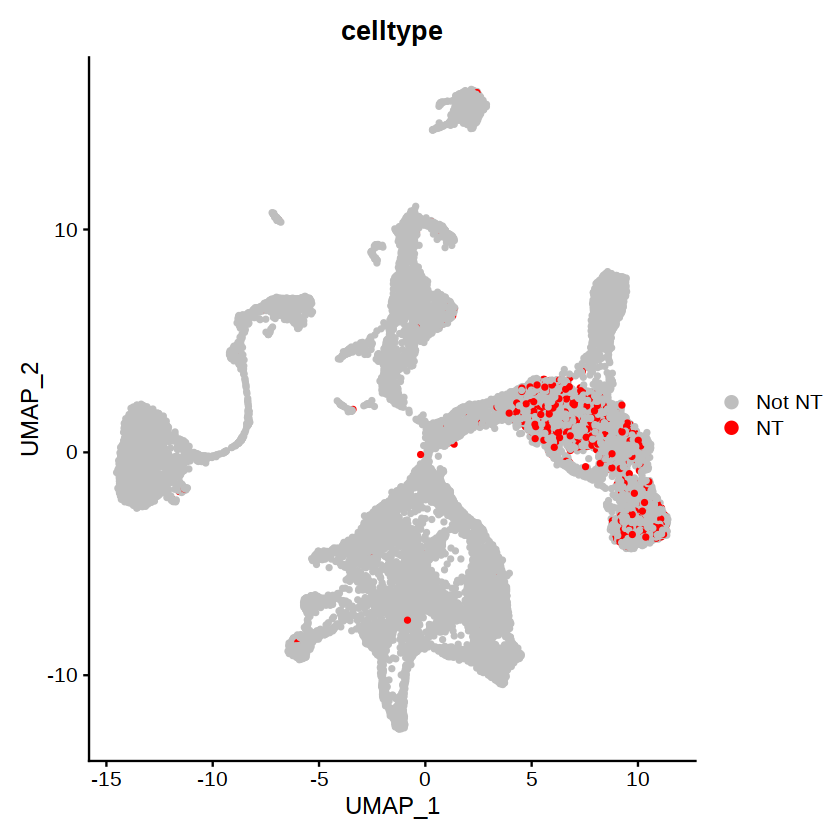

In [7]:
combi <- Emb8
combi@meta.data$celltype <-
  ifelse(
    rownames(combi@meta.data) %in% colnames(nte), "NT", "Not NT")
#combi$SIdentity <- paste(meoxg$Posterior,meoxg$Anterior)
DimPlot(object = combi, group.by = 'celltype', pt.size = 1, cols = c("grey", "red"))

In [8]:
combig <- SetIdent(combi, value = combi@meta.data$celltype)
markers <- FindMarkers(combig, ident.1 = "NT", ident.2 = "Not NT", only.pos = TRUE, pseudocount.use = 0.1)
markers <- head(markers, n=50)
markers <- markers[,0]
markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sox2,0.000000e+00,1.7433816,0.860,0.297,0.000000e+00
Sox1,0.000000e+00,3.1954387,1.000,0.058,0.000000e+00
Pax6,3.897806e-267,1.8168865,0.602,0.166,7.949575e-263
Crabp2,4.517106e-260,1.5959186,0.981,0.705,9.212638e-256
Hes5,2.022524e-256,1.8593308,0.576,0.158,4.124937e-252
Sfrp1,9.275957e-247,1.5096814,0.936,0.520,1.891831e-242
Ptn,3.429802e-233,1.4620286,0.978,0.693,6.995081e-229
Fez1,6.987833e-208,1.4996548,0.528,0.154,1.425169e-203
Mir124-2hg,9.655103e-208,1.3818820,0.390,0.086,1.969158e-203


In [9]:
markers <- markers[,0]
markers

Sox2
Sox1
Pax6
Crabp2
Hes5
Sfrp1
Ptn
Fez1
Mir124-2hg
Map1b
Sfrp2


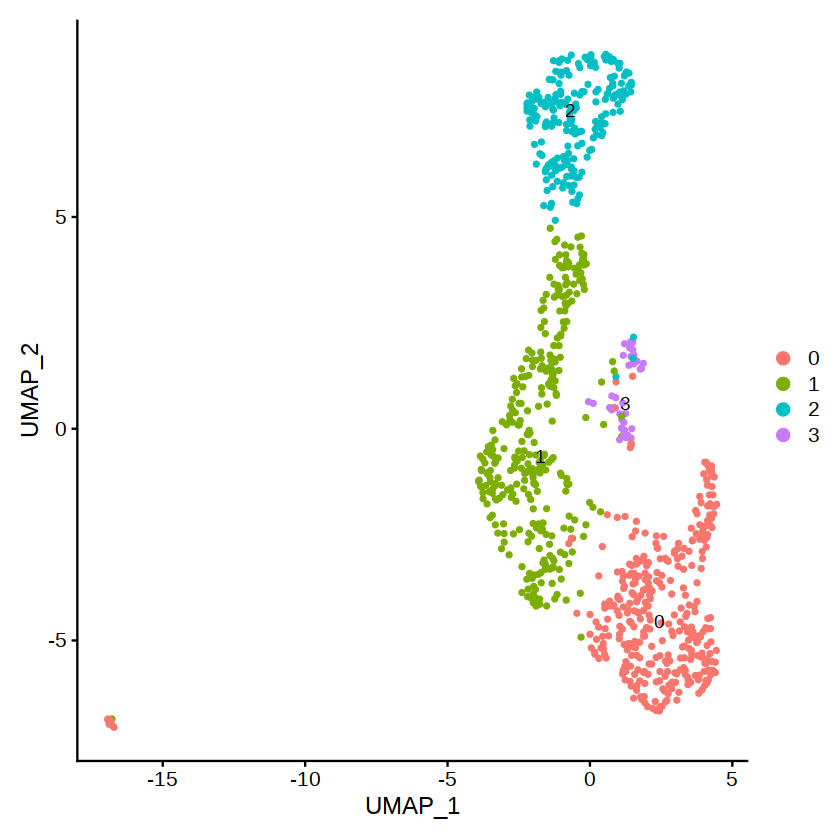

In [5]:
DimPlot(nte, reduction = 'umap', label = T)

In [16]:
nocd <- subset(x = nte, subset = Cdx2 < 0.5)
cdx2 <- subset(x = nte, subset = Cdx2 > 0.5) 

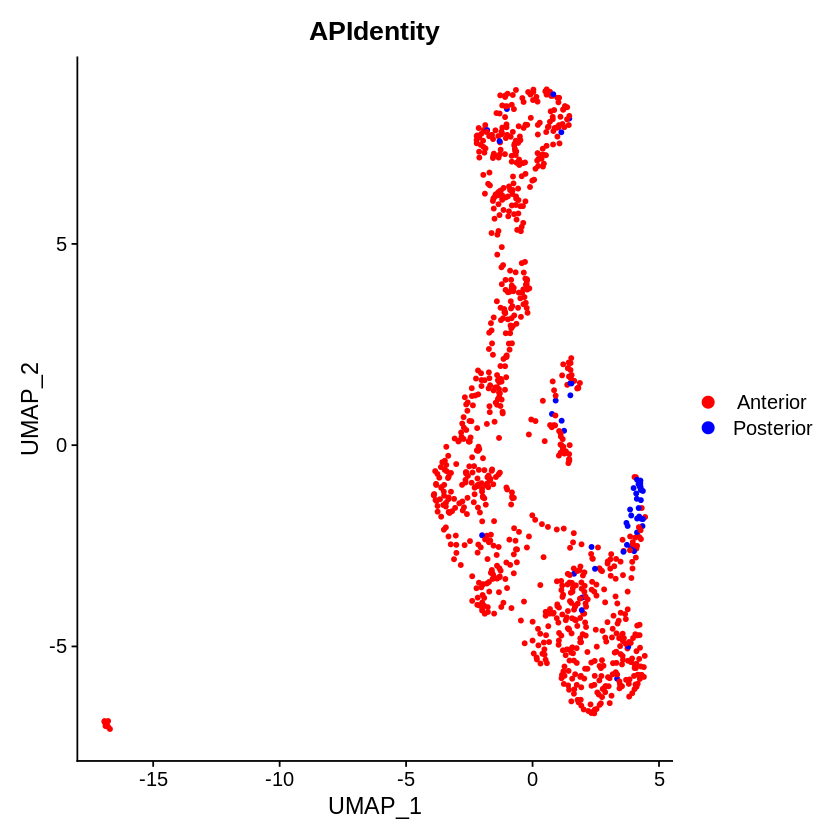

In [17]:
nte@meta.data$Anterior <-
  ifelse(
    rownames(nte@meta.data) %in% colnames(nocd), "Anterior", "")
nte@meta.data$Posterior <-
  ifelse(
    rownames(nte@meta.data) %in% colnames(cdx2), "Posterior", "")
nte$APIdentity <- paste(nte$Posterior,nte$Anterior)
#nte@meta.data
pl1 <- DimPlot(object = nte, group.by = 'APIdentity', pt.size = 1, cols = c("red", "blue"))
pl1 

In [18]:
ntube.g <- SetIdent(nte, value = nte@meta.data$APIdentity)
Pmarkers <- FindMarkers(ntube.g, ident.2 = " Anterior", ident.1 =  "Posterior ", only.pos = TRUE, pseudocount.use = 0.1)
Amarkers <- FindMarkers(ntube.g, ident.1 = " Anterior", ident.2 =  "Posterior ", only.pos = TRUE, pseudocount.use = 0.1)
Amarkers <- head(Amarkers, n=50)
Amarkers <- Amarkers[,0]
Amarkers
Pmarkers <- head(Pmarkers, n=50)
Pmarkers <- Pmarkers[,0]
Pmarkers

Sfrp1
Nr2f1
Ptn
Tmsb4x
Pls3
Nme1
Fez1
Psme3
Mir124-2hg
Rad23b
Hsdl1


Cdx2
Cdx4
Hoxc8
Hoxc9
Hoxc6
Hoxa9
Evx1os
Hoxa7
Hoxb9
Hoxaas3
Hoxb8


In [20]:
write.csv(Pmarkers, file = 'markers.csv')

In [6]:
emb8 <- Emb8

In [13]:
df <- subset(x = Emb8, subset = Mesp2 > 1 | Ripply2 > 1) 
psm <- subset(x = Emb8, subset = Tbx6 > 0.5 & T < 0.5 & Sox2 < 0.5)

An object of class Seurat 
20395 features across 139 samples within 1 assay 
Active assay: RNA (20395 features, 0 variable features)

In [14]:
df <- NormalizeData(df, verbose = TRUE)
df <- FindVariableFeatures(df, verbose = TRUE)
df <- ScaleData(df, verbose = TRUE)
df <- RunPCA(df, features = VariableFeatures(object = df), verbose = TRUE)
df <- FindNeighbors(df, dims = 1:20)
df <- FindClusters(df, resolution = 0.2)
df <- RunUMAP(df, dims = 1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  Krt8, Car4, Krt18, Spink1, Sparc, Pitx2, Steap2, Tex264, Cdh1, Fermt1 
	   Nrk, Rbm47, BC025446, Foxa2, Tdh, Apoe, 2610528J11Rik, Trf, Ttr, Cldn7 
	   Rnf128, Fmr1nb, Thnsl2, Stx3, Slc39a4, Rhox5, Itga3, Apom, Peg10, Clic6 
Negative:  Ifitm1, Meox1, Hes7, Cdc20, Lfng, Cadm1, Tuba1b, Hoxd1, Foxc2, Gstm5 
	   Ripply2, Apip, Tcf15, Ccnb1, Cited2, Hoxb9, Nrarp, Cdx1, Ube2c, H2afx 
	   Cited1, Bub3, Ppp1r1a, Spry2, Coq6, Meis1, Hoxa5, Cks2, Ngfr, Cer1 
PC_ 2 
Positive:  Acp5, Chchd10, Hba-x, Hbb-bh1, Dhrs11, Gypa, Cited4, Hebp1, Hba-a1, Klf1 
	   Epor, Car2, Spns2, Alas2, Trim10, Mgst3, Spta1, Blvrb, Gata1, Slc4a1 
	   Hbb-y, Hbb-bs, Slc30a10, Hba-a2, Fam210b, Slc38a5, Slc39a8, Snca, Ncf4, Nxpe2 
Negative:  Serpinh1, Hmga2, Tpm1, Marcks, Nrp1, Mest, Cryab, Fbn2, Anxa3, Hand1 
	   Cnn2, Nnat, Basp1, Tbx20, Asb4, Wnt2, Col1a1, Tagln, Slc25a4, Set 
	   Cenpf, Foxp1, Cald1, Pcdh19, Cadm1, Ahnak, Fn1, Svep1, Jph2, Lgals1 
PC_ 3 
Positive:  Fox

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 139
Number of edges: 5275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8106
Number of communities: 2
Elapsed time: 0 seconds


11:19:43 UMAP embedding parameters a = 0.9922 b = 1.112

11:19:43 Read 139 rows and found 20 numeric columns

11:19:43 Using Annoy for neighbor search, n_neighbors = 30

11:19:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:19:43 Writing NN index file to temp file /tmp/Rtmp3M3LoK/file1c48c42bddfb3

11:19:43 Searching Annoy index using 1 thread, search_k = 3000

11:19:43 Annoy recall = 100%

11:19:44 Commencing smooth kNN distance calibration using 1 thread

11:19:45 Initializing from normalized Laplacian + noise

11:19:45 Commencing optimization for 500 epochs, with 4772 positive edges

11:19:46 Optimization finished



In [15]:
emb8@meta.data$df <-
  ifelse(
    rownames(emb8@meta.data) %in% colnames(df), "DF", "")
emb8@meta.data$PSM <-
  ifelse(
    rownames(emb8@meta.data) %in% colnames(psm), "PSM", "")
emb8$Identity <- paste(emb8$df,emb8$PSM)
emb8@meta.data

ERROR: Error in rownames(emb8@meta.data): object 'emb8' not found


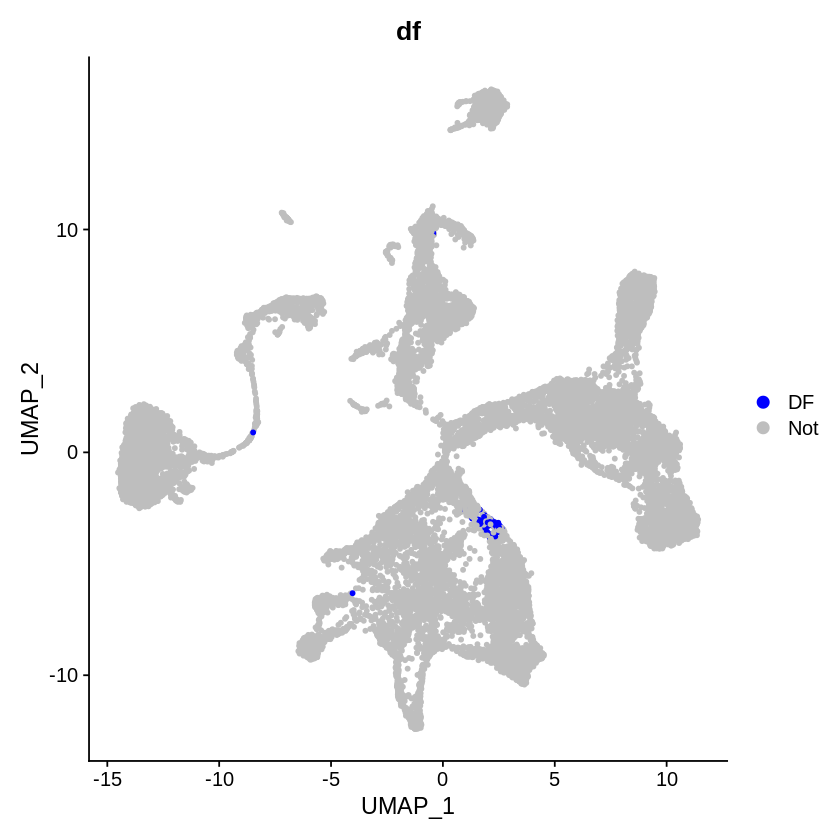

In [12]:
DimPlot(object = emb8, group.by = 'Identity', pt.size = 1, cols = c("grey","red",'green',"grey"))

In [13]:
dfg <- SetIdent(emb8, value = emb8@meta.data$Identity)
Dmarkers <- FindMarkers(dfg, ident.1 =  "DF ",ident.2 =  " PSM", only.pos = TRUE, pseudocount.use = 0.1)
DF_all <- Dmarkers[,0]
DF_all <- head(DF_all , n=50)
DF_all
Pmarkers <- FindMarkers(dfg, ident.1 =  " PSM",ident.2 =  "DF ", only.pos = TRUE, pseudocount.use = 0.1)
PF_all <- Pmarkers[,0]
PF_all <- head(PF_all , n=50)
PF_all

Mesp1
Mesp2
Ripply2
Fgf18
Pcdh8
Cer1
Pcdh19
Dll3
Synm
Wnt16
Tbx6


In [20]:
write.csv(DF_all, file = 'markers.csv')

In [14]:
psm <- subset(x = Emb8, subset = Tbx6 > 0.5 & T < 0.5 & Sox2 < 0.5)

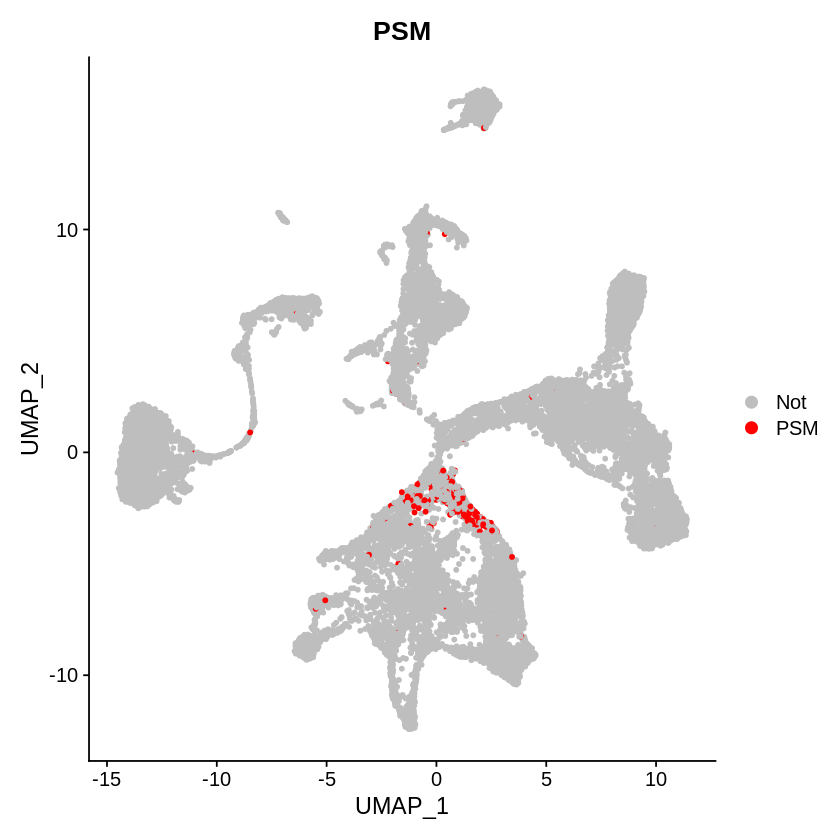

In [18]:
emb8@meta.data$PSM <-
  ifelse(
    rownames(emb8@meta.data) %in% colnames(psm), "PSM", "Not")
DimPlot(object = emb8, group.by = 'PSM', pt.size = 1, cols = c("grey","red"))

In [19]:
psmg <- SetIdent(emb8, value = emb8@meta.data$PSM)
markers <- FindMarkers(psmg, ident.1 =  "PSM", only.pos = TRUE)
psm_all <- markers[,0]
psm_all <- head(psm_all , n=50)
psm_all

Dll3
Tbx6
Hes7
Pcdh19
Dll1
Rnf213
Mesp2
Rspo3
Hoxb5os
Hoxaas3
Gm14226
